### 1) Netflix 설명에서 감정 단어 WordCloud 생성

Netflix `description` 컬럼을 이용해

감정 관련 단어들만 추출하여 WordCloud를 생성하시오.

조건

- 대소문자 통일
- 감정 단어 예시: `love, fear, hope, anger, family, friendship, revenge, joy`
- 위 단어들만 남기도록 필터링
- `max_words=50`

**Hint**

- `" ".join(df["description"].dropna().astype(str))`
- `text.lower()`
- `tokens = text.split()`
- `if token in emotion_words`

['family', 'family', 'love', 'love', 'family', 'love', 'love', 'revenge', 'family', 'love', 'love', 'family', 'revenge', 'love', 'family', 'family', 'love', 'family', 'family', 'family', 'love', 'love', 'revenge', 'love', 'revenge', 'family', 'love', 'family', 'joy', 'family', 'family', 'love', 'love', 'family', 'love', 'love', 'family', 'revenge', 'love', 'love', 'revenge', 'love', 'love', 'love', 'love', 'family', 'love', 'family', 'love', 'fear', 'family', 'revenge', 'love', 'family', 'family', 'hope', 'family', 'love', 'revenge', 'love', 'love', 'family', 'revenge', 'love', 'friendship', 'family', 'family', 'family', 'family', 'love', 'love', 'love', 'family', 'family', 'family', 'family', 'love', 'friendship', 'friendship', 'family', 'family', 'family', 'love', 'family', 'family', 'love', 'family', 'family', 'family', 'family', 'love', 'love', 'family', 'friendship', 'revenge', 'family', 'family', 'family', 'family', 'family', 'friendship', 'love', 'family', 'love', 'love', 'love'

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

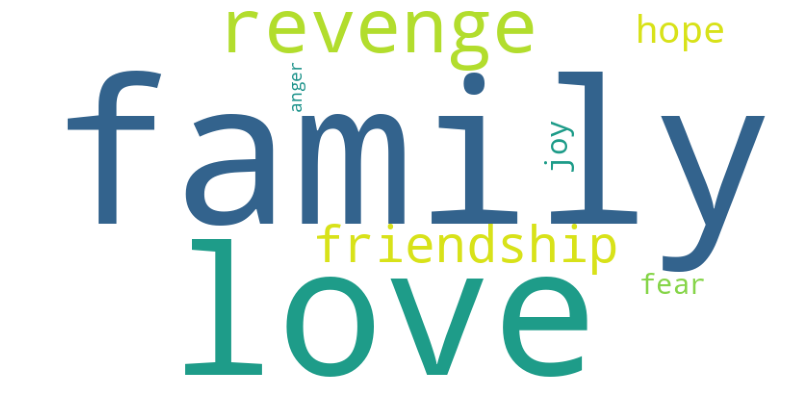

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd
from PIL import Image
import numpy as np
import re
from collections import Counter

netflix = pd.read_csv("../netflix_preprocessed.csv", encoding="utf-8")
#print(netflix.head())
text = " ".join(netflix["description"].dropna().astype("str"))
# 하나의 문자열로 합치기
text = text.lower() # 소문자 변환
#print(text)  # 앞부분 500자 출력
text = re.sub(r"[^a-z\s]", " ", text)  # 특수문자 제거
text = re.sub(r"\s+"," ", text).strip()  # 특수문자 제거
tokens = text.split()
#print(len(tokens))  # 앞부분 50개 단어 출력
#print(tokens[0:100])  # 앞부분 50개 단어 출력
emotion_words = ["love", "fear", "hope", "anger", "family", "friendship", "revenge", "joy"]
emotion_tokens = [t for t in tokens if t in emotion_words]
print(emotion_tokens)
freq = Counter(emotion_tokens)
print("="*100)
print(freq)
wc = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(freq)
# .generate_from_frequencies(freq) 단어의 빈도수를 가지고 워드칼라우드 만들기

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
#plt.title("넷플릭스 설명에 자주 등장하는 감정 단어 워드클라우드")

### 2) 단어 길이 조건에 따른 WordCloud 비교

Netflix `description` 텍스트를 이용해

단어 길이 조건을 다르게 적용한 WordCloud 두 개를 생성하시오.

조건

- WordCloud A: 단어 길이 ≥ 3
- WordCloud B: 단어 길이 ≥ 6
- 나머지 설정은 동일하게 유지
- 두 결과를 비교하여 관찰

**Hint**

- `len(token) >= N`
- 동일한 `WordCloud()` 설정 재사용
- `Counter(tokens)`

as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable. after crossing paths at a party, a cape town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth. to protect his family from a powerful drug lord, skilled thief mehdi and his expert team of robbers are pulled into a violent and deadly turf war. feuds, flirtations and toilet talk go down among the incarcerated women at the orleans justice center in new orleans on this gritty reality series. in a city of coaching centers known to train india’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life. the arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe. equestria's divided. but a bright-eyed hero believes earth ponies, pegasi and unicorns should be p

Text(0.5, 1.0, '단어 길이 6자 이상 워드클라우드')

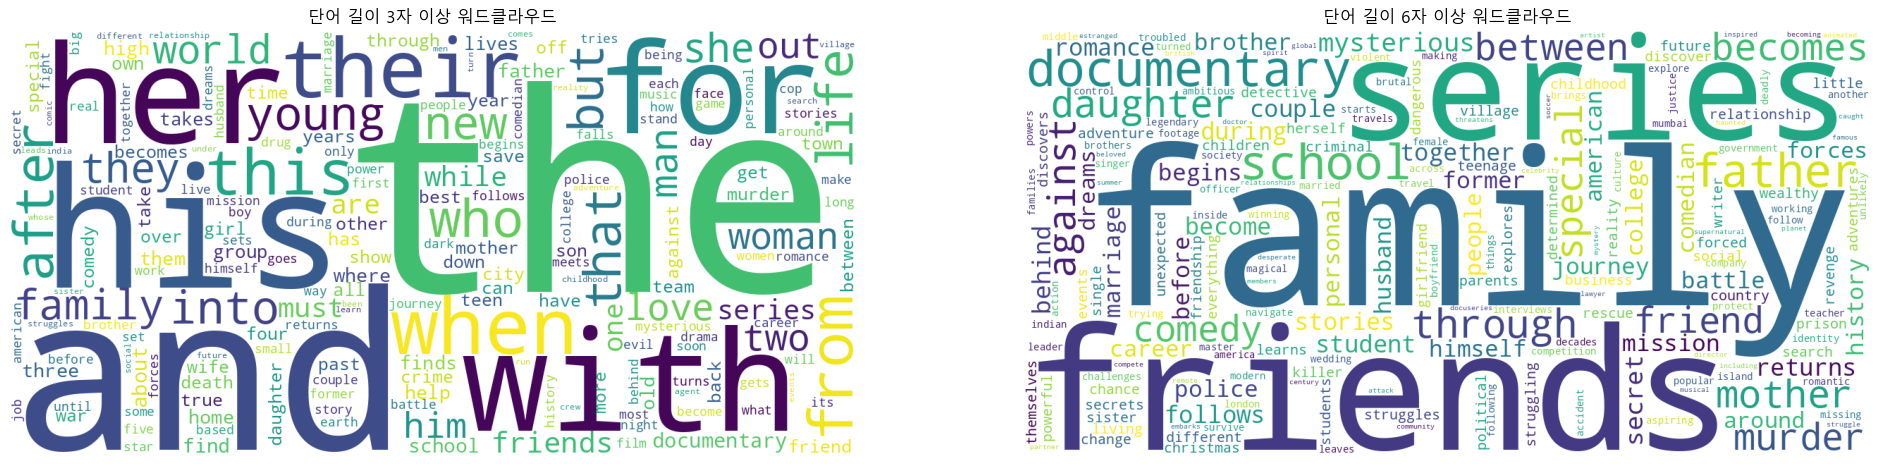

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd
from PIL import Image
import numpy as np
import re
from collections import Counter
plt.rcParams["font.family"] = "Malgun Gothic"   # 윈도우 기본 한글 폰트
plt.rcParams["axes.unicode_minus"] = False  
netflix = pd.read_csv("../netflix_preprocessed.csv", encoding="utf-8")
#print(netflix.head())
text = " ".join(netflix["description"].dropna().astype("str"))
#print(text)  # 앞부분 500자 출력
text = text.lower() # 소문자 변환
print(text)  # 앞부분 500자 출력
print("="*100)
text = re.sub(r"[^a-z\s]", " ", text)  # 특수문자 제거  \s 공백문자  "공백 또는 탭 줄바꿈"
print(text)  # 앞부분 500자 출력
print("="*100)
text = re.sub(r"\s+"," ", text).strip()  # 특수문
print(text)  # 앞부분 500자 출력
tokens = text.split()
print("="*100)
print(tokens[:50])  # 앞부분 50개 단어 출력
tokens_len03 = [t for t in tokens if len(t) >= 3]  #list comprehension
tokens_len06 = [t for t in tokens if len(t) >= 6]  #list comprehension  
freq_len03 = Counter(tokens_len03)
freq_len06 = Counter(tokens_len06)
wc = WordCloud(background_color="white", 
               width=1200, 
               height=600, 
               colormap="viridis").generate_from_frequencies(freq_len03)
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
plt.imshow(wc)
plt.axis("off")
plt.title("단어 길이 3자 이상 워드클라우드")

wc2 = WordCloud(background_color="white", 
                width=1200, 
                height=600, 
                colormap="viridis").generate_from_frequencies(freq_len06)
plt.subplot(1,2,2)
plt.imshow(wc2)
plt.axis("off")
plt.title("단어 길이 6자 이상 워드클라우드")

### 3) 연어(collocations) 옵션 비교 WordCloud

Netflix `description` 텍스트를 이용해

`collocations` 옵션에 따른 WordCloud 변화를 확인하시오.

조건

- WordCloud A: `collocations=True`
- WordCloud B: `collocations=False`
- 두 WordCloud에서 나타나는 단어 차이를 비교

**Hint**

- `WordCloud(collocations=True)`
- `WordCloud(collocations=False)`
- `plt.subplot()`으로 나란히 배치

as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable. after crossing paths at a party, a cape town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth. to protect his family from a powerful drug lord, skilled thief mehdi and his expert team of robbers are pulled into a violent and deadly turf war. feuds, flirtations and toilet talk go down among the incarcerated women at the orleans justice center in new orleans on this gritty reality series. in a city of coaching centers known to train india’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life. the arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe. equestria's divided. but a bright-eyed hero believes earth ponies, pegasi and unicorns should be p

Text(0.5, 1.0, 'collocations = False 인 워드클라우드')

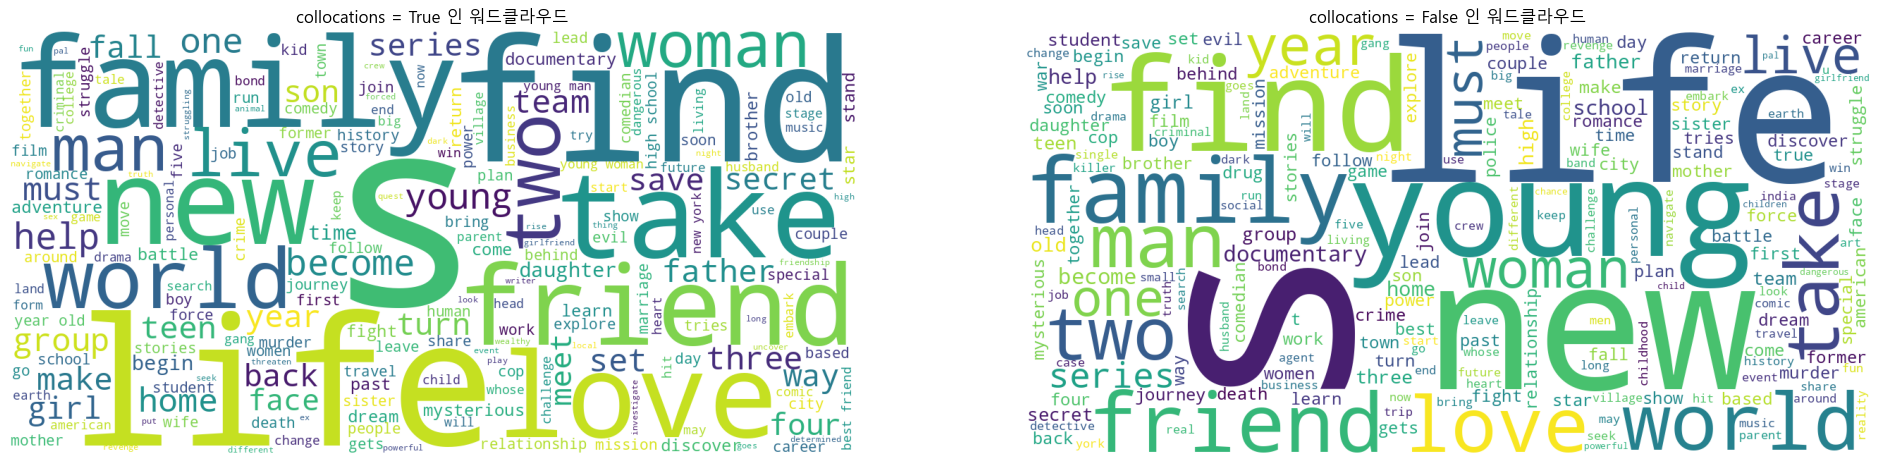

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd
from PIL import Image
import numpy as np
import re
from collections import Counter
plt.rcParams["font.family"] = "Malgun Gothic"   # 윈도우 기본 한글 폰트
plt.rcParams["axes.unicode_minus"] = False  
netflix = pd.read_csv("../netflix_preprocessed.csv", encoding="utf-8")
#print(netflix.head())
text = " ".join(netflix["description"].dropna().astype("str"))
#print(text)  # 앞부분 500자 출력
text = text.lower() # 소문자 변환
print(text)  # 앞부분 500자 출력
print("="*100)
text = re.sub(r"[^a-z\s]", " ", text)  # 특수문자 제거  \s 공백문자  "공백 또는 탭 줄바꿈"
print(text)  # 앞부분 500자 출력
print("="*100)
text = re.sub(r"\s+"," ", text).strip()  # 특수문
print(text)  # 앞부분 500자 출력
tokens = text.split()

wc_true = WordCloud(background_color="white", 
               width=1200, 
               height=600, 
               collocations=True,
               colormap="viridis").generate(text)
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
plt.imshow(wc_true)
plt.axis("off")
plt.title("collocations = True 인 워드클라우드")



wc_false = WordCloud(background_color="white", 
                width=1200, 
                height=600, 
                collocations=False,
                colormap="viridis").generate(text)
plt.subplot(1,2,2)
plt.imshow(wc_false)
plt.axis("off")
plt.title("collocations = False 인 워드클라우드")